In [ ]:
#This needs the food data from project 2 to run (ie the data folder in project 2)

In [2]:
!pip uninstall cfe
!pip install -r requirements.txt

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached numpy-1.22.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached pandas-1.4.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.7 MB)
  Using cached plotly-5.7.0-py2.py3-none-any.whl (28.8 MB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
Processing /home/jovyan/.cache/pip/wheels/20/7e/30/7d702acd6a1e89911301cd9dbf9cb9870ca80c0e64bc2cde23/gnupg-2.3.1-py3-none-any.whl
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
  Attempting uninstall: plotly
    Found existing installatio

In [3]:
import cfe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#r = cfe.result.from_dataset('Indian ICRISAT_small.ds',engine='netcdf4')
r = cfe.result.from_dataset('Nigeria_small.ds',engine = 'netcdf4')
UseNutrients=['Protein','Calories','Iron']

# Reference period, market
#t,m = 75,1
t,m = 2010,1

# Reference budget (find mean in reference period & market):
reference_x = r.get_predicted_expenditures().mean('j').sum('i').sel(t=t,m=m)

p = r.prices.sel(t=t,m=m,drop=True)
p = p.to_dataframe('i').squeeze().dropna()
p

Missing dependencies for OracleDemands.


/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


i                        u                    
(Cocoyam, Spinach, etc)  Basket: Small (15 kg)    2121.212121
                         Grams                       0.139593
                         Kilograms                  68.315621
Agricultural eggs        Basin: Small (10 kg)       25.161967
                         Basket: Small (15 kg)      27.268338
                                                     ...     
Yam flour                Kilograms                 225.491453
Yam-roots                Basin: Small (10 kg)      435.393258
                         Basket: Small (15 kg)     304.000000
                         Grams                       0.098436
                         Kilograms                  61.296256
Name: i, Length: 297, dtype: float64

In [4]:
# In first round, averaged over households and villages

zbar = r.z.sel(t=r.firstround,drop=True).mean(['j','m'])[:].squeeze() # Leave out log HSize

zbar = zbar.to_dataframe().squeeze()

In [6]:
#needs diet minimums from project2 to run
bmin = pd.read_csv('./diet_minimums (1).csv').set_index('Nutrition').iloc[:,2:]
bmin['M 0-3'] = bmin['C 1-3']
bmin['F 0-3'] = bmin['C 1-3']
bmin = bmin.drop(columns = ['C 1-3'])
bmin

,F 4-8,M 4-8,F 9-13,M 9-13,F 14-18,M 14-18,F 19-30,M 19-30,F 31-50,M 31-50,F 51+,M 51+,M 0-3,F 0-3
Nutrition,,,,,,,,,,,,,,
Energy,1200.0,1400.0,1600.0,1800.0,1800.0,2200.0,2000.0,2400.0,1800.0,2200.0,1600.0,2000.0,1000.0,1000.0
Protein,19.0,19.0,34.0,34.0,46.0,52.0,46.0,56.0,46.0,56.0,46.0,56.0,13.0,13.0
"Fiber, total dietary",16.8,19.6,22.4,25.2,25.2,30.8,28.0,33.6,25.2,30.8,22.4,28.0,14.0,14.0
"Folate, DFE",200.0,200.0,300.0,300.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,400.0,150.0,150.0
"Calcium, Ca",1000.0,1000.0,1300.0,1300.0,1300.0,1300.0,1000.0,1000.0,1000.0,1000.0,1200.0,1000.0,700.0,700.0
"Carbohydrate, by difference",130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0,130.0
"Iron, Fe",10.0,10.0,8.0,8.0,15.0,11.0,18.0,8.0,18.0,8.0,8.0,8.0,7.0,7.0
"Magnesium, Mg",130.0,130.0,240.0,240.0,360.0,410.0,310.0,400.0,320.0,420.0,320.0,420.0,80.0,80.0
Niacin,8.0,8.0,12.0,12.0,14.0,16.0,14.0,16.0,14.0,16.0,14.0,16.0,6.0,6.0


In [7]:
#rda = pd.read_pickle('indian_rda.df').T
rda = bmin
# May need to tweak types or alignment to match RDA and zbar types:
rda0,zbar0=rda.align(zbar,axis=1)

# This matrix product gives minimum nutrient requirements for average
# household in 1975
hh_rda = rda0.replace('',0)@zbar0

# RDA is /daily/, but  demands in ICRISAT data are /annual/:
hh_rda = hh_rda*7

In [8]:
#household recommended nutrient intake weekly
hh_rda

Nutrition
Energy                             69597.396787
Protein                             1541.084808
Fiber, total dietary                 974.363555
Folate, DFE                        12960.463697
Calcium, Ca                        42004.555623
Carbohydrate, by difference         5230.510474
Iron, Fe                             433.014846
Magnesium, Mg                      11027.982510
Niacin                               494.256661
Phosphorus, P                      30869.387838
Potassium, K                      173432.011389
Riboflavin                            38.837828
Thiamin                               37.723978
Vitamin A, RAE                     25826.682937
Vitamin B-12                          77.762782
Vitamin B-6                           43.119544
Vitamin C, total ascorbic acid      2331.923937
Vitamin E (alpha-tocopherol)         483.172260
Vitamin K (phylloquinone)           3123.036404
Zinc, Zn                             311.829571
dtype: float64

In [9]:
from eep153_tools.sheets import read_sheets
DataURL = '1crT3R7MaSdT2H2W7HF-4N_7_zzgM4It0iuzmS10TV2w'
fct = read_sheets(DataURL)
Nigeria_nutrition = fct['Codes'][['Food description','USDA FDC ID']].rename(columns = {'Food description':'Food','USDA FDC ID':'FDC'})
Nigeria_nutrition

Key available for students@eep153.iam.gserviceaccount.com.


,Food,FDC
0,Guinea corn/sorghum,169716
1,Millet,168871
2,Maize,1441697
3,Rice--local,169757
4,Rice--imported,169757
...,...,...
91,Beer (local and imported),1104393
92,Palm wine,173185
93,Pito,1104393
94,Gin,1104487


In [10]:
import fooddatacentral as fdc
#apikey = "98io1g6FBoC8R3VH3ixwfMmoZHEtTge9UyS9kouU"
apikey = "6dOSTulT97hD6btEezfeO876tZyzbrLhmY0LL8uf"
id = 169400    # Put an FDC ID HERE!
fdc.nutrients(apikey,fdc_id=id)

,Quantity,Units
Proximates,0.000,g
Water,92.500,g
Energy,96.000,kJ
Protein,2.980,g
Total lipid (fat),0.780,g
Ash,1.040,g
Carbohydrates,0.000,g
"Carbohydrate, by difference",2.710,g
"Fiber, total dietary",2.100,g
Minerals,0.000,mg


In [14]:
#filling in FDC codes that were outdated in the list we were given
Nigeria_nutrition = Nigeria_nutrition.set_index('Food')
Nigeria_nutrition.loc['Maize'] = 1103351
Nigeria_nutrition.loc['Milk powder'] = 1970648
Nigeria_nutrition.loc['Cassava flour'] = 1955537
Nigeria_nutrition.loc['Butter/Margarine'] = 1956025
Nigeria_nutrition

,FDC
Food,
Guinea corn/sorghum,169716
Millet,168871
Maize,1103351
Rice--local,169757
Rice--imported,169757
...,...
Beer (local and imported),1104393
Palm wine,173185
Pito,1104393


In [15]:
Nigeria_nutrition = Nigeria_nutrition.reset_index()
Nigeria_nutrition

,Food,FDC
0,Guinea corn/sorghum,169716
1,Millet,168871
2,Maize,1103351
3,Rice--local,169757
4,Rice--imported,169757
...,...,...
91,Beer (local and imported),1104393
92,Palm wine,173185
93,Pito,1104393
94,Gin,1104487


In [20]:
#once again we need to make a new fct table for Nigeria
#the original class function
import warnings
apikey = "6dOSTulT97hD6btEezfeO876tZyzbrLhmY0LL8uf" 
df = Nigeria_nutrition
D = {}
count = 0
for food in  df.Food.tolist():
    try:
        FDC = df.loc[df.Food==food,:].FDC[count]
        count+=1
        D[food] = fdc.nutrients(apikey,FDC).Quantity
    except AttributeError: 
        warnings.warn("Couldn't find FDC Code %s for food %s." % (food,FDC))        

D = pd.DataFrame(D,dtype=float)

D

,Guinea corn/sorghum,Millet,Maize,Rice--local,Rice--imported,Bread,Maize flour,Yam flour,Cassava flour,Wheat flour,...,Sachet water,Malt drinks,"Soft drinks (Coca Cola, spirit, etc)",Fruit juice canned/Pack,Other non--alcoholic drinks,Beer (local and imported),Palm wine,Pito,Gin,Other alcoholic beverages
Alanine,1.033,0.314,NaN,0.156,0.156,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
"Alcohol, ethyl",NaN,0.000,0.00,0.000,0.000,NaN,NaN,NaN,NaN,NaN,...,0.00,7.70,0.00,0.00,NaN,3.90,10.40,3.90,33.40,33.40
Amino acids,0.000,0.000,0.00,0.000,0.000,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
Arginine,0.355,0.122,NaN,0.224,0.224,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
Ash,1.430,0.410,NaN,0.410,0.410,2.10,1.44,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.24,NaN,NaN,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vitamin K (Menaquinone-4),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vitamin K (phylloquinone),NaN,0.300,0.30,0.000,0.000,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,2.30,NaN,0.00,0.00,0.00,0.00,NaN
Vitamins and Other Components,0.000,0.000,0.00,0.000,0.000,0.00,0.00,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.00
Water,12.400,71.410,76.05,68.440,68.440,35.70,10.83,NaN,NaN,NaN,...,99.90,91.00,89.36,86.71,NaN,91.96,86.58,91.96,66.60,66.60


In [21]:
Food = D.T.fillna(0)
Food = Food.reset_index().rename(columns={'index':'i'}).set_index('i')
Food

,Alanine,"Alcohol, ethyl",Amino acids,Arginine,Ash,Aspartic acid,Betaine,"Boron, B",Caffeine,"Calcium, Ca",...,"Vitamin D (D2 + D3), International Units",Vitamin D3 (cholecalciferol),Vitamin E (alpha-tocopherol),"Vitamin E, added",Vitamin K (Dihydrophylloquinone),Vitamin K (Menaquinone-4),Vitamin K (phylloquinone),Vitamins and Other Components,Water,"Zinc, Zn"
i,,,,,,,,,,,,,,,,,,,,,
Guinea corn/sorghum,1.033,0.0,0.0,0.355,1.43,0.743,0.0,0.0,0.0,13.0,...,0.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,12.40,1.67
Millet,0.314,0.0,0.0,0.122,0.41,0.231,0.0,0.0,0.0,3.0,...,0.0,0.0,0.02,0.0,0.0,0.0,0.3,0.0,71.41,0.91
Maize,0.000,0.0,0.0,0.000,0.00,0.000,0.0,0.0,0.0,2.0,...,0.0,0.0,0.07,0.0,0.0,0.0,0.3,0.0,76.05,0.46
Rice--local,0.156,0.0,0.0,0.224,0.41,0.253,0.0,0.0,0.0,10.0,...,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,68.44,0.49
Rice--imported,0.156,0.0,0.0,0.224,0.41,0.253,0.0,0.0,0.0,10.0,...,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,68.44,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Beer (local and imported),0.000,3.9,0.0,0.000,0.00,0.000,0.0,0.0,0.0,4.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,91.96,0.01
Palm wine,0.000,10.4,0.0,0.000,0.24,0.000,0.0,0.0,0.0,8.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,86.58,0.13
Pito,0.000,3.9,0.0,0.000,0.00,0.000,0.0,0.0,0.0,4.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,91.96,0.01


In [23]:
#for Nigeria

#DataURL = '1crT3R7MaSdT2H2W7HF-4N_7_zzgM4It0iuzmS10TV2w'
#fct = read_sheets(DataURL)
#type(fct)
#pd.DataFrame(fct,index=[0])

In [24]:
def my_prices(p0,p=p,i='Coconut'):
    p = p.copy()
    p.loc[i] = p0
    return p

In [25]:
fct = Food

In [26]:
fct['Protein'].index

Index(['Guinea corn/sorghum', 'Millet', 'Maize', 'Rice--local',
       'Rice--imported', 'Bread', 'Maize flour', 'Yam flour', 'Cassava flour',
       'Wheat flour', 'Other grains and flour', 'Cassava--roots', 'Yam--roots',
       'Gari--white', 'Gari--yellow', 'Cocoyam', 'Plantains', 'Sweet potatoes',
       'Potatoes', 'Other roots and tuber', 'Soya beans', 'Brown beans',
       'White beans', 'Groundnuts', 'Other nuts/seeds/pulses', 'Palm oil',
       'Butter/Margarine', 'Groundnut oil', 'Other oils and fats', 'Bananas',
       'Orange/tangerine', 'Mangoes', 'Avocado pear', 'Pineapples',
       'Fruit canned', 'Other fruits', 'Tomatoes', 'Tomato puree (canned)',
       'Onions', 'Garden eggs/egg plant', 'Okra--fresh', 'Okra--dried',
       'Pepper', 'Leaves (Cocoyam, Spinach, etc.)',
       'Other vegetables (fresh or canned)', 'Chicken', 'Duck',
       'Other domestic poultry', 'Agricultural eggs', 'Local eggs',
       'Other eggs (not chicken)', 'Beef', 'Mutton', 'Pork', 'Goat',
  

In [27]:
fct = fct.rename({'Fish--dried':'Fish-Dried','Fish--fresh':'Fish-Fresh','Fish--frozen':'Fish-Frozen','Fish--smoked':'Fish-Smoked',
                 'Rice--imported':'Rice-Imported','Rice--local':'Rice-local'},axis = 'index')
#'Fish-Dried', 'Fish-Fresh', 'Fish-Frozen', 'Fish-Smoked',
#somehow these labels get messed up in the cfe so need to rename to fix

In [28]:
#checking that I did indeed fix this
fct.index

Index(['Guinea corn/sorghum', 'Millet', 'Maize', 'Rice-local', 'Rice-Imported',
       'Bread', 'Maize flour', 'Yam flour', 'Cassava flour', 'Wheat flour',
       'Other grains and flour', 'Cassava--roots', 'Yam--roots', 'Gari--white',
       'Gari--yellow', 'Cocoyam', 'Plantains', 'Sweet potatoes', 'Potatoes',
       'Other roots and tuber', 'Soya beans', 'Brown beans', 'White beans',
       'Groundnuts', 'Other nuts/seeds/pulses', 'Palm oil', 'Butter/Margarine',
       'Groundnut oil', 'Other oils and fats', 'Bananas', 'Orange/tangerine',
       'Mangoes', 'Avocado pear', 'Pineapples', 'Fruit canned', 'Other fruits',
       'Tomatoes', 'Tomato puree (canned)', 'Onions', 'Garden eggs/egg plant',
       'Okra--fresh', 'Okra--dried', 'Pepper',
       'Leaves (Cocoyam, Spinach, etc.)', 'Other vegetables (fresh or canned)',
       'Chicken', 'Duck', 'Other domestic poultry', 'Agricultural eggs',
       'Local eggs', 'Other eggs (not chicken)', 'Beef', 'Mutton', 'Pork',
       'Goat', 'Wil

In [29]:
import warnings 

def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)

    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

In [30]:
original_p = p
original_p

i                        u                    
(Cocoyam, Spinach, etc)  Basket: Small (15 kg)    2121.212121
                         Grams                       0.139593
                         Kilograms                  68.315621
Agricultural eggs        Basin: Small (10 kg)       25.161967
                         Basket: Small (15 kg)      27.268338
                                                     ...     
Yam flour                Kilograms                 225.491453
Yam-roots                Basin: Small (10 kg)      435.393258
                         Basket: Small (15 kg)     304.000000
                         Grams                       0.098436
                         Kilograms                  61.296256
Name: i, Length: 297, dtype: float64

In [33]:
#selecting only units of kilograms
p = p.unstack('u')['Kilograms']

In [36]:
#all labels in original price vector
len(pd.DataFrame(original_p).rename(columns = {'i':'i original'}).reset_index()['i'].unique())

90

In [37]:
#all labels in kilogram parsed vector
len(pd.DataFrame(p).rename(columns = {'i':'i original'}).reset_index()['i'].unique())

90

In [38]:
sum(p.isna())

0

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

Text(0, 0.5, 'log nutrient')

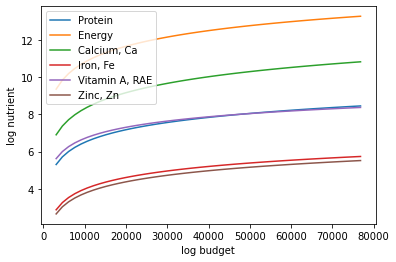

In [40]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(reference_x/5,reference_x*5,50)

UseNutrients = ['Protein','Energy','Calcium, Ca','Iron, Fe','Vitamin A, RAE', 'Zinc, Zn']
df = pd.concat({myx:np.log(nutrient_demand(myx,p))[UseNutrients] for myx in X},axis=1).T
ax = df.plot()

ax.set_xlabel('log budget')
ax.set_ylabel('log nutrient')

In [41]:
def my_prices(p0,p=p,i='Coconut'):
    p = p.copy()
    p.loc[i] = p0
    return p

In [90]:
#Here figured out the most important sources of protein (also did for various other nutrients!)
pd.DataFrame(fct['Calcium, Ca'].sort_values(ascending = False).index)

,i
0,Milk powder
1,Pepper
2,Okra--dried
3,Milk tinned (unsweetened)
4,White beans
...,...
91,Gari--yellow
92,Gari--white
93,Other grains and flour
94,Wheat flour


In [44]:
pd.DataFrame(p.index.values).isin(r.prices.sel(t=t,m=m,drop=True).i.values)


,0
0,True
1,True
2,True
3,True
4,True
...,...
85,True
86,True
87,True
88,True


In [45]:
r.prices.sel(t=t,m=m,drop=True).i.values

array(['(Cocoyam, Spinach, etc)', 'Agricultural eggs', 'Animal fat',
       'Apples', 'Avocado pear', 'Baby milk powder', 'Bananas', 'Beef',
       'Beer (local and imported)', 'Biscuits', 'Bottled water', 'Bread',
       'Brown beans', 'Buns/PofPof/Donuts', 'Butter/Margarine', 'Cake',
       'Canned', 'Canned beef/corned beef', 'Canned fish/seafood',
       'Cashew nut', 'Cassava flour', 'Cassava-Roots', 'Cheese (wara)',
       'Chicken', 'Chocolate drinks', 'Coconut', 'Coconut oil', 'Cocoyam',
       'Coffee', 'Condiments,(salt,spices,pepper, etc)', 'Dry pepper',
       'Duck', 'Fish-Dried', 'Fish-Fresh', 'Fish-Frozen', 'Fish-Smoked',
       'Fresh milk', 'Fresh pepper', 'Fruit juice canned',
       'Garden eggs/egg plant', 'Gari -Yellow', 'Gari-White', 'Gin',
       'Goat', 'Grinded pepper', 'Groundnut oil', 'Groundnuts',
       'Groundnuts (shelled)', 'Groundnuts (unshelled)', 'Guava',
       'Guinea Corn/Sorghum', 'Honey', 'Jams', 'Kola nut', 'Local eggs',
       'Maize', 'Maize (

In [46]:
r.prices.sel(t=t,m=m,drop=True).i

<xarray.DataArray 'i' (i: 124)>
array(['(Cocoyam, Spinach, etc)', 'Agricultural eggs', 'Animal fat', 'Apples',
       'Avocado pear', 'Baby milk powder', 'Bananas', 'Beef',
       'Beer (local and imported)', 'Biscuits', 'Bottled water', 'Bread',
       'Brown beans', 'Buns/PofPof/Donuts', 'Butter/Margarine', 'Cake',
       'Canned', 'Canned beef/corned beef', 'Canned fish/seafood',
       'Cashew nut', 'Cassava flour', 'Cassava-Roots', 'Cheese (wara)',
       'Chicken', 'Chocolate drinks', 'Coconut', 'Coconut oil', 'Cocoyam',
       'Coffee', 'Condiments,(salt,spices,pepper, etc)', 'Dry pepper', 'Duck',
       'Fish-Dried', 'Fish-Fresh', 'Fish-Frozen', 'Fish-Smoked', 'Fresh milk',
       'Fresh pepper', 'Fruit juice canned', 'Garden eggs/egg plant',
       'Gari -Yellow', 'Gari-White', 'Gin', 'Goat', 'Grinded pepper',
       'Groundnut oil', 'Groundnuts', 'Groundnuts (shelled)',
       'Groundnuts (unshelled)', 'Guava', 'Guinea Corn/Sorghum', 'Honey',
       'Jams', 'Kola nut', 'Local eggs', 'Maize', 'Maize (off the cob/grains)',
       'Maize (on the cob)', 'Maize (shelled/off the cob)',
       'Maize (shelled/on the cob)', 'Maize (unshelled/on the cob)',
       'Maize flour', 'Maize shelled', 'Malt drinks', 'Mangoes',
       'Meat pie/Sausage roll', 'Melon (ground)', 'Melon (shelled)',
       'Melon (unshelled)', 'Milk powder', 'Milk tinned (unsweetened)',
       'Millet', 'Mutton', 'Ogbonno grinded', 'Ogbonno ungrinded',
       'Okra-dried', 'Okra-fresh', 'Onions', 'Orange/tangerine',
       'Other Non-acoholic drinks', 'Other Oil and Fat',
       'Other alcoholic beverages', 'Other domestic poultry',
       'Other eggs (not chicken)', 'Other fish or seafood', 'Other fruites',
       'Other grains and flour', 'Other meat (excl. poultry)',
       'Other milk products', 'Other non-acoholic drinks',
       'Other nuts/seeds/pulses', 'Other oils and fats',
       'Other roots and tuber', 'Other sweets Confectionary',
       'Other vegetables (fresh or canned)', 'Palm oil', 'Palm wine', 'Pawpaw',
       'Pepper', 'Pineapples', 'Pito', 'Plantains', 'Pork', 'Potatoes',
       'Rice-Imported', 'Rice-local', 'Sachet water', 'Salt',
       'Seafood (lobster, crab, prawns)', 'Sheabutter', 'Snails',
       'Soft drinks (Coca cola, spirit etc)', 'Soya beans', 'Sugar',
       'Sweet Potatoes', 'Tea', 'Tomato puree(canned)', 'Tomatoes',
       'Watermelon', 'Wheat flour', 'White beans', 'Wild game meat',
       'Yam flour', 'Yam-roots'], dtype=object)
Coordinates:
  * i        (i) object '(Cocoyam, Spinach, etc)' ... 'Yam-roots'

/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/conda/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(uf

Text(0, 0.5, 'log nutrient')

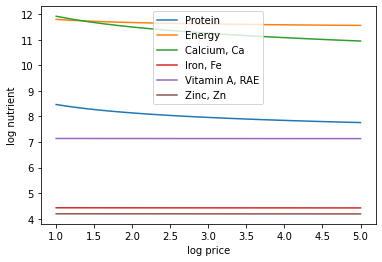

In [47]:
USE_GOOD = 'Milk powder'

ref_price = r.prices.sel(i=USE_GOOD,t=t,m=m,drop=True)

P =  np.linspace(1,5,20).tolist()

ndf = pd.DataFrame({p0:np.log(nutrient_demand(reference_x,my_prices(p0,i=USE_GOOD)))[UseNutrients] for p0 in P}).T

ax = ndf.plot()

ax.set_xlabel('log price')
ax.set_ylabel('log nutrient')

In [48]:
#nutritional adaquecy part
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda

In [78]:
hh_rda

Nutrition
Energy                             69597.396787
Protein                             1541.084808
Fiber, total dietary                 974.363555
Folate, DFE                        12960.463697
Calcium, Ca                        42004.555623
Carbohydrate, by difference         5230.510474
Iron, Fe                             433.014846
Magnesium, Mg                      11027.982510
Niacin                               494.256661
Phosphorus, P                      30869.387838
Potassium, K                      173432.011389
Riboflavin                            38.837828
Thiamin                               37.723978
Vitamin A, RAE                     25826.682937
Vitamin B-12                          77.762782
Vitamin B-6                           43.119544
Vitamin C, total ascorbic acid      2331.923937
Vitamin E (alpha-tocopherol)         483.172260
Vitamin K (phylloquinone)           3123.036404
Zinc, Zn                             311.829571
dtype: float64

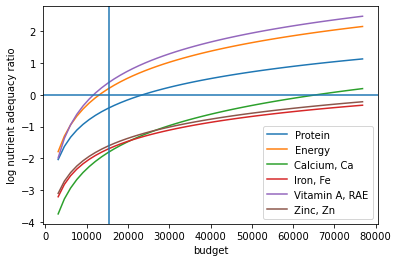

In [80]:
#the normal one
X = np.linspace(reference_x/5,reference_x*5,50)

ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T

ax = ndf.plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0)
ax.axvline(reference_x)

In [55]:
USE_GOOD = 'Canned beef/corned beef'

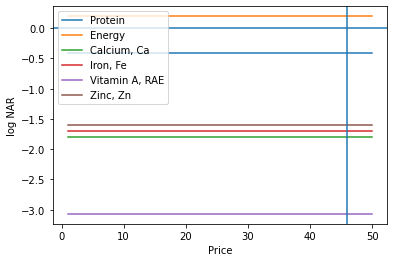

In [56]:
#tracing nutritional adaquacy while changing price of a certain good
poorer_x = reference_x/2
#reference_x = the average budget
Pscale = np.linspace(1,50,100).tolist()
#need to change scale to fit the price of the good
log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,p,i=USE_GOOD)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
#ax.set_xlim([1,3])
ax.axvline(p[USE_GOOD])

In [57]:
USE_GOOD = 'Fish-Dried'

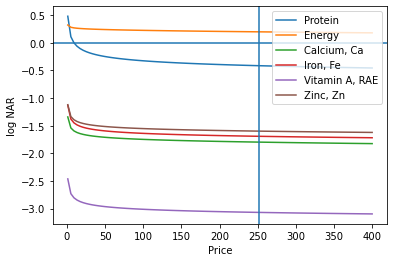

In [58]:
#not touching this was for milk powder
#tracing nutritional adaquacy while changing price of a certain good
poorer_x = reference_x
#reference_x = the average budget
Pscale = np.linspace(1,400,100).tolist()
#need to change scale to fit the price of the good
log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,p,i=USE_GOOD)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
#ax.set_xlim([1,3])
ax.axvline(p[USE_GOOD])

In [59]:
USE_GOOD = 'Milk powder'

Text(0.5, 1.0, 'Effect of Varying Milk Powder Price on Calcium Nutrition')

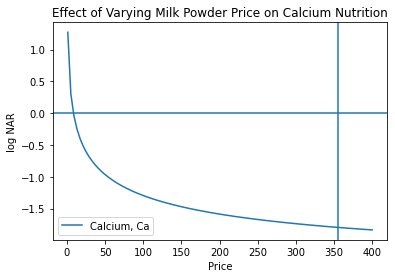

In [95]:
#tracing nutritional adaquacy while changing price of a certain good
poorer_x = reference_x/2
#reference_x = the average budget
Pscale = np.linspace(1,400,100).tolist()
#need to change scale to fit the price of the good
UseNutrients = ['Calcium, Ca']
log_nar = {s0:np.log(nutrient_adequacy_ratio(reference_x,my_prices(s0,p,i=USE_GOOD)))[UseNutrients] for s0 in Pscale}

log_nar = pd.DataFrame(log_nar).T

ax = log_nar.plot(ylabel='log NAR',xlabel='Price')


ax.axhline(0)
#ax.set_xlim([1,3])
ax.axvline(p[USE_GOOD])
ax.set_title('Effect of Varying Milk Powder Price on Calcium Nutrition')

In [61]:
!pip install CFEDemands --upgrade --pre
!pip install xarray

Requirement already up-to-date: CFEDemands in /opt/conda/lib/python3.9/site-packages (0.4.1)
  Using cached python_dateutil-2.8.2-py2.py3-none-any.whl (247 kB)
  Attempting uninstall: python-dateutil
    Found existing installation: python-dateutil 2.8.0
    Uninstalling python-dateutil-2.8.0:
      Successfully uninstalled python-dateutil-2.8.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

pysal 2.5.0 requires python-dateutil<=2.8.0, but you'll have python-dateutil 2.8.2 which is incompatible.
pysal 2.5.0 requires urllib3>=1.26, but you'll have urllib3 1.25.7 which is incompatible.
pynwb 1.5.1 requires h5py<3,>=2.9, but you'll have h5py 3.3.0 which is incompatible.
pynwb 1.5.1 requires hdmf<3,>=2.5.6, but you'll have hdmf 2.4.0 which is inc

In [62]:
import cfe

In [63]:
r.get_beta(as_df = True).dropna().sort_values(ascending = False)

i
Milk powder                             0.621545
Sugar                                   0.569223
Rice-local                              0.557892
Chocolate drinks                        0.541461
Rice-Imported                           0.535315
Seafood (lobster, crab, prawns)         0.528855
Agricultural eggs                       0.492709
Condiments,(salt,spices,pepper, etc)    0.414796
Fish-Dried                              0.403277
Sachet water                            0.403258
Fish-Fresh                              0.386942
White beans                             0.371580
Onions                                  0.368187
Fish-Smoked                             0.354824
Bread                                   0.346662
Soft drinks (Coca cola, spirit etc)     0.346603
Groundnut oil                           0.344536
Sweet Potatoes                          0.339676
Malt drinks                             0.338216
Tomato puree(canned)                    0.337039
Bananas           

In [64]:
#could just say put in golden rice and change nutritional values and see what it does

In [65]:
#GOLDEN RICE WORKSPACE

In [66]:
import fooddatacentral as fdc
#apikey = "98io1g6FBoC8R3VH3ixwfMmoZHEtTge9UyS9kouU"
apikey = "6dOSTulT97hD6btEezfeO876tZyzbrLhmY0LL8uf"
id = 169400    # Put an FDC ID HERE!
fdc.nutrients(apikey,fdc_id=id)

,Quantity,Units
Proximates,0.000,g
Water,92.500,g
Energy,96.000,kJ
Protein,2.980,g
Total lipid (fat),0.780,g
Ash,1.040,g
Carbohydrates,0.000,g
"Carbohydrate, by difference",2.710,g
"Fiber, total dietary",2.100,g
Minerals,0.000,mg


In [67]:
fdc.search(apikey = apikey ,term = 'Golden Rice')
#golden rice doesn't exist so going to manually input the vitamin A

,fdcId,description,lowercaseDescription,commonNames,additionalDescriptions,dataType,foodCode,publishedDate,foodCategory,foodCategoryId,allHighlightFields,score,foodNutrients,finalFoodInputFoods,foodMeasures,foodAttributes,foodAttributeTypes,foodVersionIds,scientificName,ndbNumber
0,1104462,Golden Cadillac,golden cadillac,,,Survey (FNDDS),93301340.0,2020-10-30,Liquor and cocktails,1000181.0,,379.64578,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Cordial or liqueur', 'gr...","[{'disseminationText': '1 fl oz', 'gramWeight'...",[],"[{'name': 'Attribute', 'description': 'Generic...",[],NaN,NaN
1,168164,"Raisins, golden, seedless","raisins, golden, seedless",,,SR Legacy,NaN,2019-04-01,Fruits and Fruit Juices,NaN,,346.01730,"[{'nutrientId': 1186, 'nutrientName': 'Folic a...",[],[],[],[],[],Vitis vinifera,9297.0
2,1101814,Cereal (Post Golden Crisp),cereal (post golden crisp),,,Survey (FNDDS),57355000.0,2020-10-30,"Ready-to-eat cereal, higher sugar (>21.2g/100g)",997533.0,,317.87488,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Cereals ready-to-eat, PO...","[{'disseminationText': '1 cup', 'gramWeight': ...",[],"[{'name': 'Attribute', 'description': 'Generic...",[],NaN,NaN
3,168077,"DENNY'S, golden fried shrimp","denny's, golden fried shrimp",family style,,SR Legacy,NaN,2019-04-01,Restaurant Foods,NaN,,317.87488,"[{'nutrientId': 1304, 'nutrientName': 'TFA 18:...",[],[],[],[],[],NaN,36612.0
4,168202,"Apples, raw, golden delicious, with skin","apples, raw, golden delicious, with skin",,,SR Legacy,NaN,2019-04-01,Fruits and Fruit Juices,NaN,,293.97730,"[{'nutrientId': 1257, 'nutrientName': 'Fatty a...",[],[],[],[],[],Malus domestica,9501.0
5,167979,"Candies, HERSHEY'S GOLDEN ALMOND SOLITAIRES","candies, hershey's golden almond solitaires",,,SR Legacy,NaN,2019-04-01,Sweets,NaN,,293.97730,"[{'nutrientId': 1104, 'nutrientName': 'Vitamin...",[],[],[],[],[],NaN,19084.0
6,1101739,Cereal (General Mills Golden Grahams),cereal (general mills golden grahams),,,Survey (FNDDS),57224000.0,2020-10-30,"Ready-to-eat cereal, higher sugar (>21.2g/100g)",997458.0,,293.97730,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Cereals ready-to-eat, GE...","[{'disseminationText': '1 cup', 'gramWeight': ...",[],"[{'name': 'Attribute', 'description': 'Generic...",[],NaN,NaN
7,1102467,Dirty rice,dirty rice,,cajun rice;rice cooked with chicken giblets,Survey (FNDDS),58163130.0,2020-10-30,Rice mixed dishes,998186.0,<b>Includes</b>: cajun <em>rice</em>;<em>rice<...,285.32785,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Chicken, broilers or fry...","[{'disseminationText': '1 cup', 'gramWeight': ...",[],"[{'name': 'Additional Description', 'descripti...",[],NaN,NaN
8,1097552,Rice milk,rice milk,,Rice Dream beverage,Survey (FNDDS),11360000.0,2020-10-30,Milk substitutes,993271.0,<b>Includes</b>: <em>Rice</em> Dream beverage,284.37933,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Beverages, rice milk, un...","[{'disseminationText': '1 cup', 'gramWeight': ...",[],"[{'name': 'Additional Description', 'descripti...",[],NaN,NaN
9,1101306,"Crackers, rice","crackers, rice",,Edward and Sons;San-J;brown rice cracker;KA-ME...,Survey (FNDDS),54319000.0,2020-10-30,"Crackers, excludes saltines",997025.0,<b>Includes</b>: Edward and Sons;San-J;brown <...,283.71640,"[{'nutrientId': 1003, 'nutrientName': 'Protein...","[{'foodDescription': 'Rice crackers', 'gramWei...","[{'disseminationText': '1 cup, NFS', 'gramWeig...",[],"[{'name': 'Additional Description', 'descripti...",[],NaN,NaN


In [83]:
#their vitamin A is in microgram 
#https://www.sciencedaily.com/releases/2009/05/090513121102.htm#:~:text=Golden%20Rice%20was%20developed%20in,of%20beta%2Dcarotene%20per%20gram. 
#35 micrograms/gram
fct['Vitamin A, RAE']['Rice-local'] = 3500
fct['Vitamin A, RAE']['Rice-Imported'] = 3500
fct['Vitamin A, RAE']

i
Guinea corn/sorghum             0.0
Millet                          0.0
Maize                           9.0
Rice-local                   3500.0
Rice-Imported                3500.0
                              ...  
Beer (local and imported)       0.0
Palm wine                       0.0
Pito                            0.0
Gin                             0.0
Other alcoholic beverages       0.0
Name: Vitamin A, RAE, Length: 96, dtype: float64

In [69]:
fct['Vitamin A, RAE']

i
Guinea corn/sorghum             0.0
Millet                          0.0
Maize                           9.0
Rice-local                   3500.0
Rice-Imported                3500.0
                              ...  
Beer (local and imported)       0.0
Palm wine                       0.0
Pito                            0.0
Gin                             0.0
Other alcoholic beverages       0.0
Name: Vitamin A, RAE, Length: 96, dtype: float64

In [70]:
def my_prices(p0,p=p,i='Coconut'):
    p = p.copy()
    p.loc[i] = p0
    return p

In [71]:
import warnings 

def nutrient_demand(x,p):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        c = r.demands(x,p)

    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

In [72]:
#nutritional adaquecy part
def nutrient_adequacy_ratio(x,p):
    return nutrient_demand(x,p)/hh_rda

In [73]:
fct['Vitamin A, RAE']

i
Guinea corn/sorghum             0.0
Millet                          0.0
Maize                           9.0
Rice-local                   3500.0
Rice-Imported                3500.0
                              ...  
Beer (local and imported)       0.0
Palm wine                       0.0
Pito                            0.0
Gin                             0.0
Other alcoholic beverages       0.0
Name: Vitamin A, RAE, Length: 96, dtype: float64

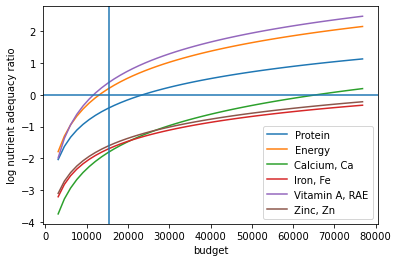

In [84]:
#the normal one
X = np.linspace(reference_x/5,reference_x*5,50)

ndf = pd.concat({x:np.log(nutrient_adequacy_ratio(x,p))[UseNutrients] for x in X},axis=1).T

ax = ndf.plot()

ax.set_xlabel('budget')
ax.set_ylabel('log nutrient adequacy ratio')
ax.axhline(0)
ax.axvline(reference_x)

In [76]:
r.get_beta(as_df = True).index.to_list()

['(Cocoyam, Spinach, etc)',
 'Agricultural eggs',
 'Animal fat',
 'Apples',
 'Avocado pear',
 'Baby milk powder',
 'Bananas',
 'Beef',
 'Beer (local and imported)',
 'Biscuits',
 'Bottled water',
 'Bread',
 'Brown beans',
 'Buns/PofPof/Donuts',
 'Butter/Margarine',
 'Cake',
 'Canned',
 'Canned beef/corned beef',
 'Canned fish/seafood',
 'Cashew nut',
 'Cassava flour',
 'Cassava-Roots',
 'Cheese (wara)',
 'Chicken',
 'Chocolate drinks',
 'Coconut',
 'Coconut oil',
 'Cocoyam',
 'Coffee',
 'Condiments,(salt,spices,pepper, etc)',
 'Dry pepper',
 'Duck',
 'Fish-Dried',
 'Fish-Fresh',
 'Fish-Frozen',
 'Fish-Smoked',
 'Fresh milk',
 'Fresh pepper',
 'Fruit juice canned',
 'Garden eggs/egg plant',
 'Gari -Yellow',
 'Gari-White',
 'Gin',
 'Goat',
 'Grinded pepper',
 'Groundnut oil',
 'Groundnuts',
 'Groundnuts (shelled)',
 'Groundnuts (unshelled)',
 'Guava',
 'Guinea Corn/Sorghum',
 'Honey',
 'Jams',
 'Kola nut',
 'Local eggs',
 'Maize',
 'Maize (off the cob/grains)',
 'Maize (on the cob)',
 'M

In [77]:
#r.get_predicted_expenditures().sel(i='Rice--local')

/opt/conda/lib/python3.9/site-packages/xarray/core/nputils.py:152: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


KeyError: 'Rice--local'

In [88]:
r.get_beta(as_df = True).dropna().sort_values(ascending = False)
#use this to show can't really find an elastic good that has a lot of calcium

i
Milk powder                             0.621545
Sugar                                   0.569223
Rice-local                              0.557892
Chocolate drinks                        0.541461
Rice-Imported                           0.535315
Seafood (lobster, crab, prawns)         0.528855
Agricultural eggs                       0.492709
Condiments,(salt,spices,pepper, etc)    0.414796
Fish-Dried                              0.403277
Sachet water                            0.403258
Fish-Fresh                              0.386942
White beans                             0.371580
Onions                                  0.368187
Fish-Smoked                             0.354824
Bread                                   0.346662
Soft drinks (Coca cola, spirit etc)     0.346603
Groundnut oil                           0.344536
Sweet Potatoes                          0.339676
Malt drinks                             0.338216
Tomato puree(canned)                    0.337039
Bananas           

In [ ]:
#maybe try dropping price to 1/50th to reach nutritional adaquacy, very sad people in Nigeria don't have much Calcium